A probability P(some outcome) is as simple as a measurement of (some outcome) divided by the total # of outcomes. In a trivial case, we can consider first the probability of dice landing on any one of the six sides. This is equal to 0.166 (1/6th). The probability of the dice landing on an even number is 0.5 - this is because the observed outcome is the set {2,4,6} which is half of the full sample space of {1,2,3,4,5,6}. Obviously, the sum of all probabilities is equal to 1. 

These are "theoretical" probabilities, meaning that they assume that you have sampled enough observations for the probability to converge to the true value. One of the major challenges with probability distributions is to understand the extent of your sampling and its convergence behavior. In this online lesson we will show how you can create different distributions in python, how you can test for the convergence, and some properties of these distribution.

First lets build upon our the idea that for any probability distribution we can examine how the # of sampled events (or experiments) influences the convergence of the probability to the theoretical value. Here is the case for our probability of the dice landing on one side as a function of events. 

In [1]:
from random import randint
from collections import Counter  #this is using the python collections module
#Counter counts the number of occurrences present in an array or list

#A function to generate random experiments
def gen(x):
    expResults = []
    for i in range(x):
        expResults.append(randint(1,6))
    return expResults

#Here we now sample 10 events, what is the probability of one of our dice landing on one of the six sides?
event1 = dict(Counter(gen(10))) #dict is a data structure with key/value pairs from the counter
probs1 = dict()  # creating a new dictionary that the probabilities will be stored in

for k, v in event1.items():
    probs1[k] = v / 10 # Store the probabilities in a new dictionary
    print("probability of", k, "is", v / 10)
print("------------------------------")

# An experiment with 1000 events, what is the probability of one of our dice landing on one of the six sides?
event2 = dict(Counter(gen(1000)))
probs2 = dict()
for k, v in event2.items():
    print("probability of", k, "is", v / 1000)
    probs2[k] = v / 1000  # Store the probabilities in a new dictionary



probability of 5 is 0.4
probability of 2 is 0.2
probability of 3 is 0.2
probability of 4 is 0.1
probability of 6 is 0.1
------------------------------
probability of 4 is 0.173
probability of 6 is 0.18
probability of 3 is 0.171
probability of 5 is 0.156
probability of 2 is 0.159
probability of 1 is 0.161


The practical way in which we may create or analyze a probabiltiy distribution depends on whether the variable that is observed is a discrete or continuous variable (see definitions in lecture 1). In the discrete case, we will use summations to determine properties of the distribution, while in the continuous case we will use integration. To take the example above, we need to convert the event items which are held in a dict data structure into a numpy array:

In [2]:
import numpy as np  #need to load numpy to do math with arrays

# first list the key value pairs in our dictionary events
result1 = dict.items(probs1)
result2 = dict.items(probs2)
# now convert the object result1 and result2 into a list
data1 = list(result1)
data2 = list(result2)

#print(event1)
#print(event2)

# now convert the list to an array
arr1 = np.array(data1)
arr2 = np.array(data2)

# print the arrays to make sure they look like they should
print("Array1: \n", arr1)
print("Array2: \n", arr2)


Array1: 
 [[5.  0.4]
 [2.  0.2]
 [3.  0.2]
 [4.  0.1]
 [6.  0.1]]
Array2: 
 [[4.    0.173]
 [6.    0.18 ]
 [3.    0.171]
 [5.    0.156]
 [2.    0.159]
 [1.    0.161]]


With the array's in hand, we can start to do some math on the observations - like calculating basic statistics of the distribution including the mean and variance. These are covered in Chapter 3 of the Introduction to Statistics online book in our syllabus (if you are unfamiliar).


In [3]:
#Now we need to define a function for the mean based upon discrete variables

def mean(t):
    return(float(sum(t)) / len(t))
mean1 = np.mean(arr1)
print ("mean1=", mean1)
mean2 = np.mean(arr2)
print ("mean2=", mean2)

mean1= 2.1
mean2= 1.8333333333333333


Now we can calculate the variance of the data, again defining a function to do so assuming discrete variables:

In [4]:
def var(t, mu):
    dev2 = [(x - mu)**2 for x in t]
    var = mean(dev2)
    return(var)
var1 = np.var(arr1)
print ("variance 1=", var1)
var2 = np.var(arr2)
print ("variance 2=", var2)

variance 1= 4.6160000000000005
variance 2= 4.236147888888889


Now we will create some data that looks like a gaussian/normal distribution;

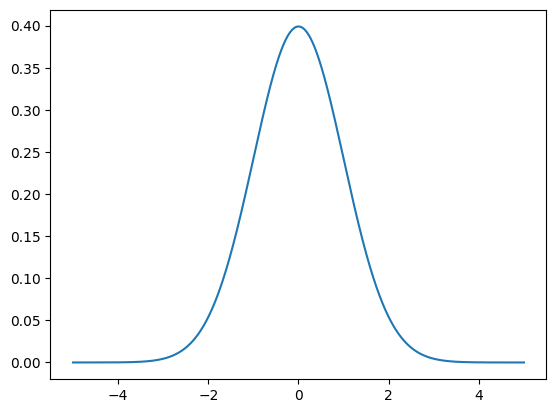

In [5]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 
  
## generate the data and plot it for an ideal normal curve
  
## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)
  
## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 0, 1)
  
## plot data
plt.plot(x_data, y_data)

HW Q1: 
a) Define a gaussian function and use the function curve_fit from the python module scipy.optimize to fit the data created in [5], x_data, y_data

b) Using the normal function of the random number generator create two normally distributed independent samples of 50 values, different means (30 and 33), and almost the same standard deviations (16 and 18). 

HW Q2: Now we will import data that has a skewed distribution (positive/negative skew) and introduce metrics to quantify the extent of the skew. In the HW folder on canvas you will finde 3 files: a dataset readme file, and two csv files that contain different characteristics of red and white wines that we will be comparing throughout the rest of the HW.

a) The statistician Pearson introduced a numerical index of skew that is:
    3(mean - median)/sigma
    
    define a function and calculate the Pearson index of skew for a histogram of fixed aciity values from the winequality-red.csv dataset.

b) a second numerical index of skew is the "third moment" about the mean, it is defined as
    sum(X - mu)^3/simga^3  (see .....insert URL here...)
    
    define the function of the third moment and calculate its value for the winequality-red.csv dataset.


C:\Users\clara\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


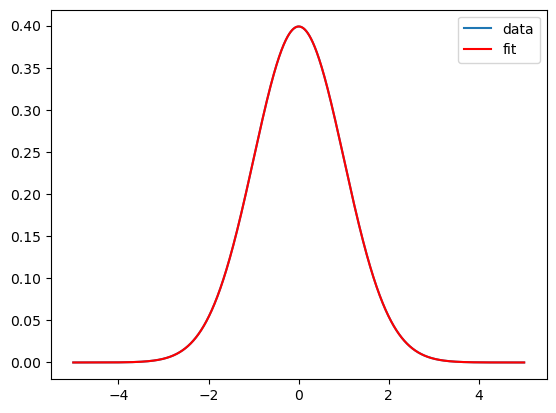

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# insert example data
x_data = np.arange(-5, 5, 0.001)
y_data = stats.norm.pdf(x_data, 0, 1)

# define the Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# fit the Gaussian function to the data using curve_fit
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=[1, 0, 1])

# plot the data and the fitted function
plt.plot(x_data, y_data, label='data')
plt.plot(x_data, gaussian(x_data, *popt), 'r-', label='fit')
plt.legend()
plt.show()


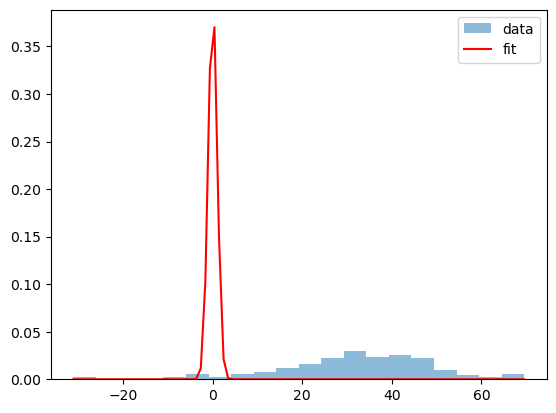

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(1234)

# generate two independent samples of size 50 from normal distributions
sample1 = np.random.normal(30, 16, size=50)
sample2 = np.random.normal(33, 18, size=50)

# concatenate the two samples into a single array
data = np.concatenate([sample1, sample2])

# create an array of x values
x_data = np.linspace(data.min(), data.max(), 100)

# define the Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# fit the Gaussian function to the data using curve_fit
popt, pcov = curve_fit(gaussian, data, stats.norm.pdf(data))

# plot the data and the fitted function
plt.hist(data, bins=20, density=True, alpha=0.5, label='data')
plt.plot(x_data, gaussian(x_data, *popt), 'r-', label='fit')
plt.legend()
plt.show()

In [7]:
import pandas as pd

# read in the dataset description file
df_desc = pd.read_csv('This PC/Documents/school/spring B 2023/advanced topics/homework 2/dataset-description.csv')

# read in the red wine quality file
df_red = pd.read_csv('This PC/Documents/school/spring B 2023/advanced topics/homework 2/winequality-red.csv', delimiter=';')

# read in the white wine quality file
df_white = pd.read_csv('This PC/Documents/school/spring B 2023/advanced topics/homework 2/winequality-white.csv', delimiter=';')

import pandas as pd
import numpy as np

# read in the red wine quality file
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

# define a function to calculate the Pearson index of skew
def pearson_skew(data):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    return 3 * (mean - median) / std_dev

# extract the fixed acidity values from the red wine quality dataset
fixed_acidity = df_red['fixed acidity']

# calculate the Pearson index of skew for the fixed acidity values
skew_index = pearson_skew(fixed_acidity)

# print the result
print('The Pearson index of skew for fixed acidity values is:', skew_index)



FileNotFoundError: [Errno 2] No such file or directory: 'This PC/Documents/school/spring B 2023/advanced topics/homework 2/dataset-description.csv'

In [8]:
import pandas as pd
import numpy as np

# read in the red wine quality file
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

# define a function to calculate the third moment about the mean
def third_moment(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return np.sum((data - mean)**3) / (len(data) * std_dev**3)

# extract the fixed acidity values from the red wine quality dataset
fixed_acidity = df_red['fixed acidity']

# calculate the third moment about the mean for the fixed acidity values
third_moment_value = third_moment(fixed_acidity)

# print the result
print('The third moment about the mean for fixed acidity values is:', third_moment_value)

The third moment about the mean for fixed acidity values is: 0.9818292953261984


HW Q3:Comparing the winquality-red.csv and the winequality-white.csv you will now calculate students t-test to assess if the two histograms of fixed acidity are statistically different. 

a) State the following hypotheses for significance level = 0.05:

Null Hypothesis (H0): Independent sample means (m1 and m2) are equal. (m1=m2)
Alternative Hypothesis (Ha): Independent sample means (m1 and m2) are not equal. (m1!=m2)

 Use the ttest_ind function to conduct a two-sample t-test. This function returns a t-statistic value and a p-value.



In [9]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# read in the red and white wine quality files
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

# extract the fixed acidity values from the red and white wine quality datasets
fixed_acidity_red = df_red['fixed acidity']
fixed_acidity_white = df_white['fixed acidity']

# calculate the mean and standard deviation of the fixed acidity values for the red wine
mean_red = np.mean(fixed_acidity_red)
std_dev_red = np.std(fixed_acidity_red)

# calculate the mean and standard deviation of the fixed acidity values for the white wine
mean_white = np.mean(fixed_acidity_white)
std_dev_white = np.std(fixed_acidity_white)

# calculate the t-statistic and p-value for a two-sample t-test
t_statistic, p_value = ttest_ind(fixed_acidity_red, fixed_acidity_white, equal_var=False)

# print the results
print('Red wine fixed acidity: mean =', mean_red, ', standard deviation =', std_dev_red)
print('White wine fixed acidity: mean =', mean_white, ', standard deviation =', std_dev_white)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

Red wine fixed acidity: mean = 8.31963727329581 , standard deviation = 1.7405518001102782
White wine fixed acidity: mean = 6.854787668436097 , standard deviation = 0.8437820791264564
t-statistic: 32.42271096728916
p-value: 5.668160586754749e-183


HW Q4: For the fixed acidity histograms for the red and white wine datasets calculate the Wasserstein distance using scipy.stats.wasserstein_distance

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance

# read in the red and white wine quality files
df_red = pd.read_csv('winequality-red.csv', delimiter=';')
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

# extract the fixed acidity values from the red and white wine quality datasets
fixed_acidity_red = df_red['fixed acidity']
fixed_acidity_white = df_white['fixed acidity']

# calculate the Wasserstein distance between the fixed acidity histograms of the two wines
wasserstein_dist = wasserstein_distance(fixed_acidity_red, fixed_acidity_white)

# print the results
print('Wasserstein distance:', wasserstein_dist)

Wasserstein distance: 1.4648496048597135


HW 5: We now seek to explore what variables may be correlated in the wine data set. Marginal histograms are a fantastic way to do this for bivariate data. Here is a code snippet that may help you get started plotting a marginal histogram:

import scipy.stat as stats
joint_plt=sns.jointplot(y='pH', x='fixed acidity', data=df, kind='reg',)

r, p= stats.pearsonr(df['fixed acidity'], df['pH']
        xy=(0.1, 0.9), xycoords='axes fraction',
        ha='left', va='center'
        bbox={'boxstyle': 'round',, 'fc': 'powderblue', 'ec': 'navy'})
        
in this code snippet you will read in the pH and fixed acidity data and create a marginal histogram that shows their correlation. 

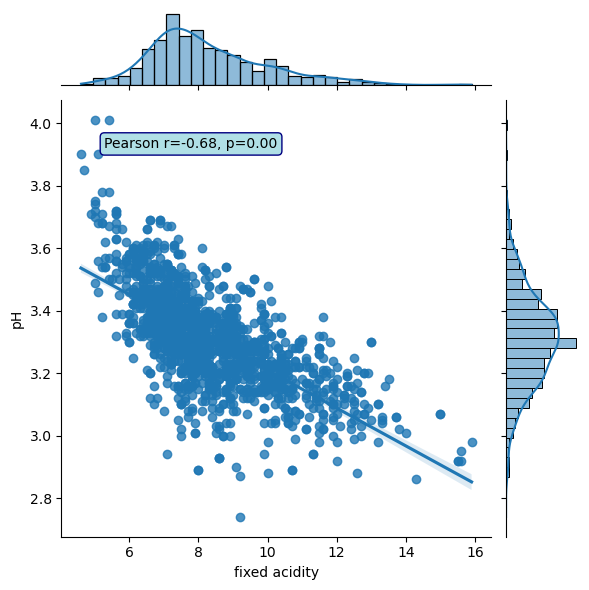

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# read in the red wine quality file
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

# create a jointplot with marginal histograms for fixed acidity and pH
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df_red, kind='reg')

# calculate the Pearson correlation coefficient between fixed acidity and pH
r, p = stats.pearsonr(df_red['fixed acidity'], df_red['pH'])

# add the correlation coefficient to the plot
plt.annotate(f'Pearson r={r:.2f}, p={p:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', ha='left', va='center', bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

# show the plot
plt.show()